In [4]:
from datasets.load import load_samples
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
#plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
def draw_bbox(ax, name, box, col='r'):
    r = patches.Rectangle((box[0], box[1]), 
                          box[2] - box[0],
                          box[3] - box[1],
                          linewidth=3,
                          edgecolor=col,
                          facecolor='none')
    ax.add_patch(r)
    ax.text(box[0], box[1], name,
            bbox={'facecolor': col, 'linewidth': 0})

def draw_annotation(ax, classes):
    colors = plt.get_cmap('tab10')
    for idx, cl in enumerate(classes):
        col = colors(idx)
        for box in cl['bounds']:
            draw_bbox(ax, cl['name'], box, col)

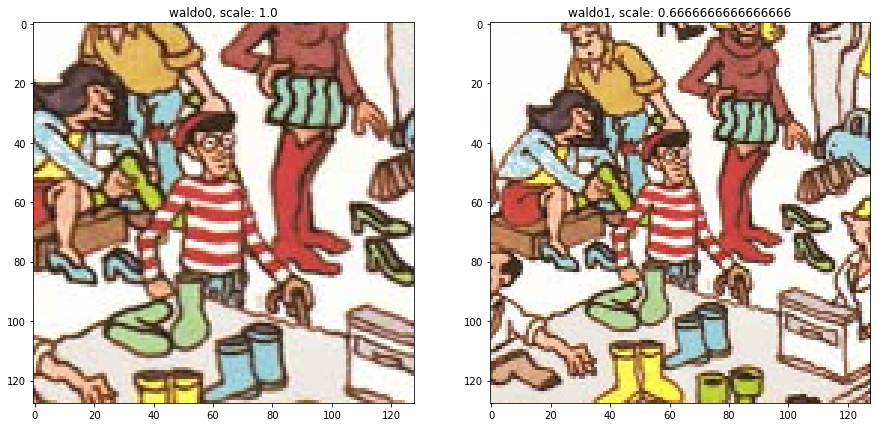

In [8]:
import pickle

waldo0_file = 'waldo1.pkl'
waldo1_file = 'waldo0.pkl'  
    
with open(waldo0_file, 'rb') as f:
    waldo0 = pickle.load(f)
with open(waldo1_file, 'rb') as f:
    waldo1 = pickle.load(f)
    
waldos = [waldo0, waldo1]

for waldo in waldos:
    #bbox = waldo['bbox']
    img = waldo['img']
    #sx, sy = bbox[2] - bbox[0], bbox[3] - bbox[1]
    #size = min(sx, sy)
    res = cv2.resize(img, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
    waldo['img'] = res
    
    
for idx, waldo in enumerate(waldos):
    ax = plt.subplot(1,2,idx +1)
    plt.imshow(waldo['img'])
    #draw_bbox(ax, waldo['name'], waldo['bbox'])
    plt.title('waldo{}, scale: {}'.format(idx, waldo['scale']))

plt.show()

In [ ]:
from scipy import ndimage


def hog(img):
    dx = ndimage.sobel(img, 0)
    dy = ndimage.soble(img, )
    